# Student Score Prediction using Supervised ML
**By: `Suraj Honkamble`**
### Level -  Beginner
### Task - 1

### Import required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Load and Read the dataset

In [6]:
df=pd.read_csv('D://DATA SCIENCE Internship with Spark Foundation//datasets//student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Statistical information

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


1. **Average study hours are 5.01 hrs, Average score is 51.480.**
2. **Minimum study hours is 1.1hr and Minimum score os 17.**
3. **Maximum study hours 9.2hr and Maximum score is 95.**

### Missing value

In [11]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**No missing rows in dataset.**

### Exploratory Data Anaysis
- Since both the columns are conrinoues numerical, for univariate analysis boxplot, frequency plot, histograms are suited one.
- Since dataset contains only two columns, hence for bivariate anaysis use Scatterplot.

Text(0.5, 1.0, 'Distribution of Students Scores')

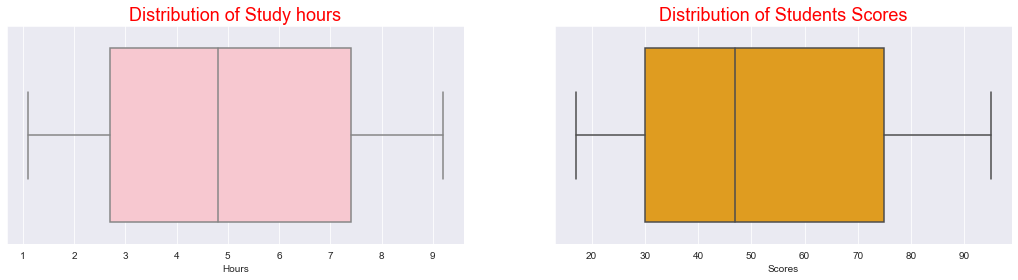

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.boxplot(x='Hours', data=df, color='pink')
plt.title("Distribution of Study hours", fontsize=18, color='red')

plt.subplot(122)
sns.boxplot(x='Scores', data=df,  color='orange')
plt.title("Distribution of Students Scores", fontsize=18, color='red')

#### From above boxplots we can conclude that there are no outliers.

Text(0.5, 1.0, 'Distribution of Students Scores')

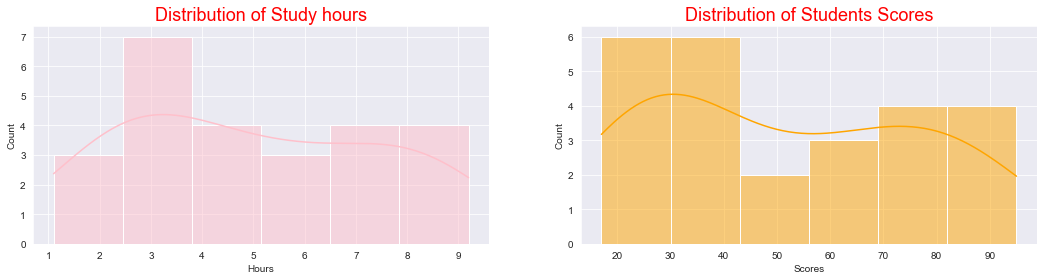

In [19]:
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.histplot(x='Hours', data=df, kde=True, color='pink')
plt.title("Distribution of Study hours", fontsize=18, color='red')

plt.subplot(122)
sns.histplot(x='Scores', data=df, kde=True, color='orange')
plt.title("Distribution of Students Scores", fontsize=18, color='red')

1. **Most of the Students study hours are between 2 to 3.**
2. **Most of the students scores 20 to 30 marks.**

### Relationship between study hours and scores

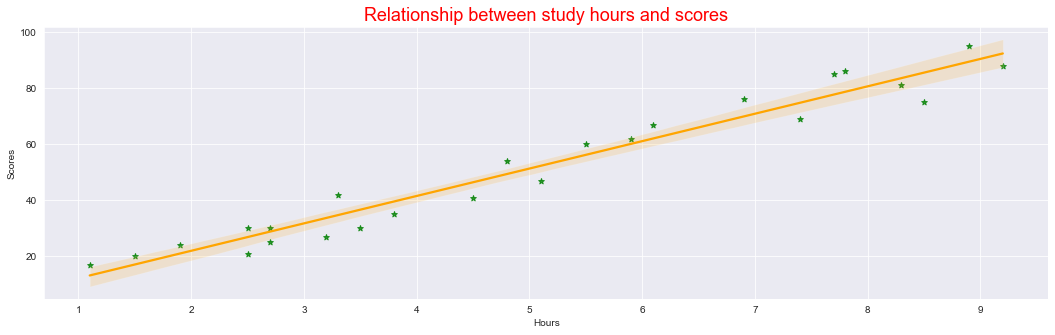

In [30]:
plt.figure(figsize=(18,5))
sns.regplot(x='Hours', y='Scores', data=df, marker='*', color='green', line_kws=dict(color='orange'))
plt.title("Relationship between study hours and scores", fontsize=18, color='red');

**Clearly we can see the positive correlation between Hours of study and scores in exam.**

## Selecting best fit Machine Learning Regression Algorithms

### Input and output features

In [57]:
X=df['Hours'].values.reshape(-1,1)
y=df['Scores'].values.reshape(-1,1)

### Split input and output features into training and testing sets

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)
print("X train shape", x_train.shape)
print("Y train shape", y_train.shape)
print("X test shape", x_test.shape)
print("Y test shape", y_test.shape)

X train shape (20, 1)
Y train shape (20, 1)
X test shape (5, 1)
Y test shape (5, 1)


### Itarate through FOR LOOP which train each and every model, make prediction and also evaluate the model

In [73]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

### Create model dictionary

In [74]:
models={
    "Linear Regresssion":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Support Vector Machine":SVR(),
    "Random Forest":RandomForestRegressor(),
    "Extra Tree":ExtraTreesRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "Gradient Boost":GradientBoostingRegressor(),
    "XGBoost":XGBRegressor()}

### Fit, Predict and Evaluate the models

In [75]:
from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_percentage_error as mape

In [80]:
for name, model in models.items():
    print("Algorithm Name:", name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("RMSE=", np.sqrt(mse(y_test,y_pred)).round(4))
    print("R2 Score=", r2(y_test,y_pred).round(4))
    print("Percentage Error=", (mape(y_test,y_pred))*100)
    print("-----"*10)

Algorithm Name: Linear Regresssion
RMSE= 4.6474
R2 Score= 0.9455
Percentage Error= 12.568891617045686
--------------------------------------------------
Algorithm Name: Lasso
RMSE= 4.5279
R2 Score= 0.9483
Percentage Error= 11.84560738710413
--------------------------------------------------
Algorithm Name: Ridge
RMSE= 4.5847
R2 Score= 0.947
Percentage Error= 12.213357772336105
--------------------------------------------------
Algorithm Name: KNN
RMSE= 5.988
R2 Score= 0.9095
Percentage Error= 12.216082281439922
--------------------------------------------------
Algorithm Name: Decision Tree
RMSE= 10.9179
R2 Score= 0.6992
Percentage Error= 26.361695496337855
--------------------------------------------------
Algorithm Name: Support Vector Machine
RMSE= 16.87
R2 Score= 0.2818
Percentage Error= 55.4605326366194
--------------------------------------------------
Algorithm Name: Random Forest
RMSE= 8.6449
R2 Score= 0.8114
Percentage Error= 16.395006969334933
--------------------------------

###  Create a dataframe of above results

In [79]:
result=pd.DataFrame()
for name, model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    rmse=np.sqrt(mse(y_test,y_pred)).round(4)
    r2_score=r2(y_test,y_pred).round(4)
    perc_error=(mape(y_test,y_pred))*100
    results=pd.DataFrame({"Algorithm Name":[name], "RMSE":[rmse], "R2 Score":[r2_score], "Percentage Error":[perc_error]})
    result=pd.concat((result,results))
result

,Algorithm Name,RMSE,R2 Score,Percentage Error
0,Linear Regresssion,4.6474,0.9455,12.568892
0,Lasso,4.5279,0.9483,11.845607
0,Ridge,4.5847,0.9470,12.213358
0,KNN,5.9880,0.9095,12.216082
0,Decision Tree,10.9179,0.6992,26.361695
0,Support Vector Machine,16.8700,0.2818,55.460533
0,Random Forest,9.0172,0.7948,18.248229
0,Extra Tree,8.8601,0.8019,19.869943
0,AdaBoost,7.8204,0.8457,17.387460
0,Gradient Boost,10.8272,0.7041,26.016502


### Plot the Barplot for each evaluation matrics

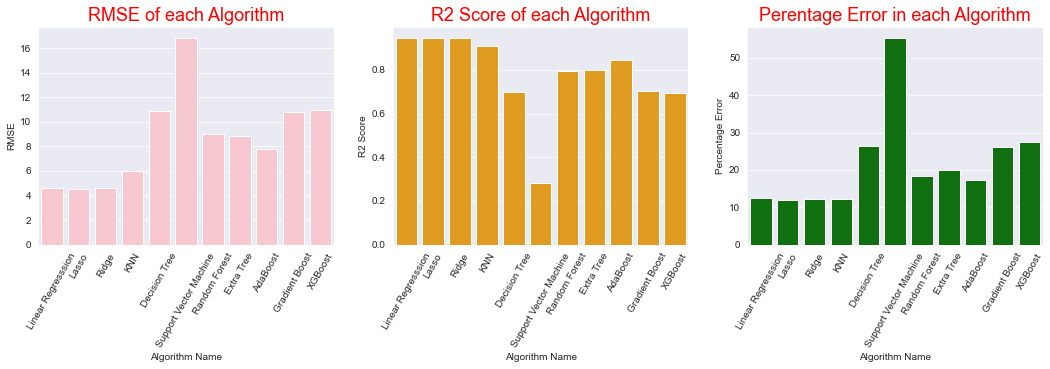

In [84]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.barplot(x='Algorithm Name', y='RMSE', data=result, color='pink')
plt.xticks(rotation=60)
plt.title("RMSE of each Algorithm", fontsize=18, color='red')

plt.subplot(132)
sns.barplot(x='Algorithm Name', y='R2 Score', data=result, color='orange')
plt.xticks(rotation=60)
plt.title("R2 Score of each Algorithm", fontsize=18, color='red')

plt.subplot(133)
sns.barplot(x='Algorithm Name', y='Percentage Error',  data=result, color='green')
plt.xticks(rotation=60)
plt.title("Perentage Error in each Algorithm", fontsize=18, color='red');

**For Lasso Regression algorithm RMSE is very low, R2 Score is very high and Percentage Error is also low, Hence select Lasso for future query prediction.**

In [100]:
model=Lasso()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

### Plot predicted and actual values

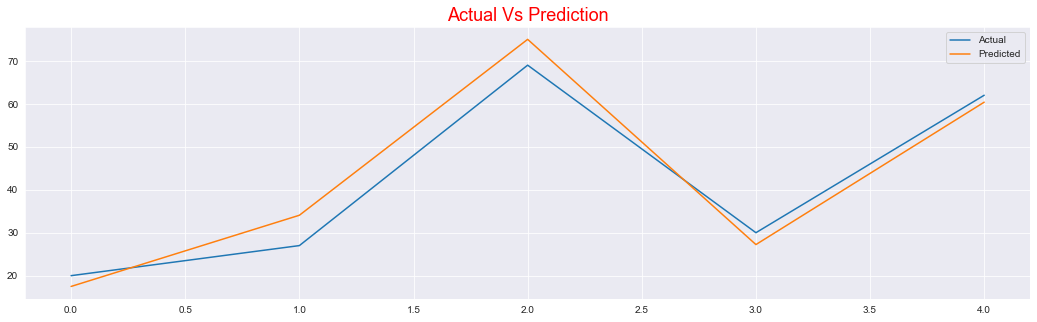

In [121]:
plt.figure(figsize=(18,5))
plt.plot(y_test, scalex=True, label='Actual')
plt.plot(y_pred, scalex=True, label='Predicted')
plt.legend()
plt.title("Actual Vs Prediction", fontsize=18, color='red');

**Very less difference between actual and predicted values.**

### Test our model on Any query
### Que- What will be the predicted score if student studied for 9.25hrs/day?

In [99]:
prediction=((model.predict([[9.25]])[0].round(2)))
print(f"Student will score {prediction} Marks, after Studying for 9.25hrs/day..")

Student will score 93.04 Marks, after Studying for 9.25hrs/day..
